## CFChemDb demo - cheminformatics db and development system
Jeremy Yang

Common Fund Data Ecosystem (CFDE)

https://github.com/nih-cfde

https://github.com/druggablegenome/idg-cfde

In [15]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [3]:
dbcon = rdktools.util.db.Connect("localhost", 5432, "cfchemdb", "www", "foobar")

In [12]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,refmet,154676
0,public,idg,251677
0,public,mols,298533
0,public,reprotox,965
0,public,lincs,32469


In [9]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,refmet,refmet_name,character varying
1,public,refmet,super_class,character varying
2,public,refmet,main_class,character varying
3,public,refmet,sub_class,character varying
4,public,refmet,formula,character varying
5,public,refmet,exactmass,character varying
6,public,refmet,inchi_key,character varying
7,public,refmet,smiles,character varying
8,public,refmet,pubchem_cid,integer
9,public,refmet,cansmi,character varying


In [19]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,Cl.NCCc1ccc(O)c(O)c1,None,1.000000
1,NCCc1ccc(O)c(O)c1,None,1.000000
2,NCCc1cc(O)c(O)c(O)c1,None,0.921986
3,NCCc1cccc(O)c1,None,0.853846
4,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
5,OCCc1ccc(O)c(O)c1,None,0.784722
6,NCCc1cc(O)c(O)cc1O,None,0.778443
7,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
8,O=CCc1ccc(O)c(O)c1,None,0.773973
9,COc1cc(CCN)ccc1O,None,0.773810


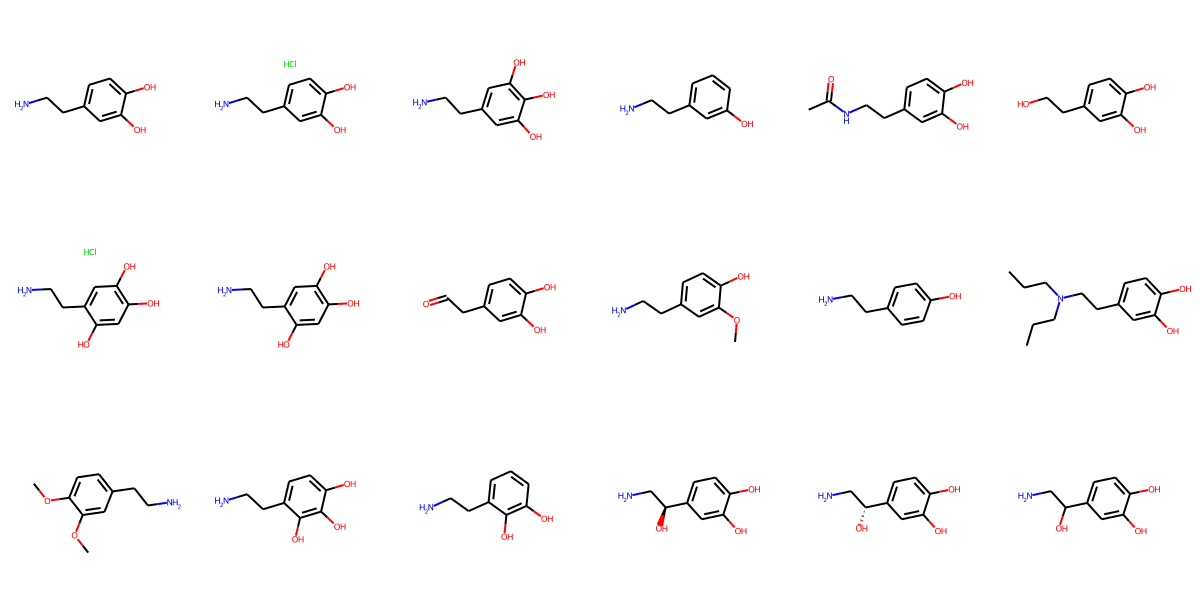

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)